In [214]:
!pip install pandas

# Краткий отчёт

#### Мы будем анализировать характер и особенности задержки рейсов в аэропортах Нью-Йорка.
#### Для этого мы будем использовать таблицу с данными о полётах и таблицу с данными о погоде в Нью-Йорке.
#### Перед каждым пунктом анализа данных будет описано, что сейчас будет происходить, а после пункта будет описано, какой вывод был получен в результате анализа.


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
df = pd.read_csv(url1, sep=',')
dw =  pd.read_csv(url2, sep=',')

In [217]:
df.head(8)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0


In [218]:
df.tail()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [219]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [220]:
dw.head(8)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0


# 1
#### Посмотрим на суммарное время задержек вылета самолётов в каждом месяце отдельно.

In [221]:
#Суммарное время задержки вылета за месяц
filtered_df=df[df.dep_delay>0]
data=pd.DataFrame(filtered_df.groupby([filtered_df.month])['dep_delay'].size().reset_index(name='Count'))
print(data)
#len(data.month)

    month  Count
0       1   9662
1       2   9124
2       3  11209
3       4  10543
4       5  11291
5       6  12655
6       7  13909
7       8  11713
8       9   7815
9      10   8722
10     11   8239
11     12  13550


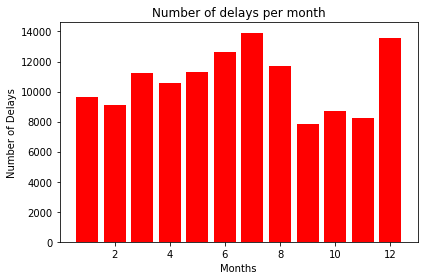

In [222]:
plt.bar(data.month, data.Count, color="red")
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per month')
plt.tight_layout()
plt.show()

#### Таким образом мы видим, что самые серьезные задержки происходят в летние месяцы и в декабре, когда поток клиентов у авиакомпаний увеличивается по понятным причинам.
#### Т.е. можно сразу же посоветовать авиакомпаниям увеличивать количество перевозчиков и вводить режим усиления в эти месяцы.

# 2
#### Сейчас мы посмотрим на то, как связаны задержки вылета самолётов со скоростью ветра в Нью-Йорке.

In [223]:
dw_and_df_merged = pd.merge(df,dw, on=['origin','day','month','hour'])
#print(dw_and_df_merged)
dw_and_df_merged[['dep_delay','wind_speed']] 
filtered_data=dw_and_df_merged[dw_and_df_merged.dep_delay>0]
times = dw_and_df_merged.groupby('wind_speed')['dep_delay'].size().reset_index(name='Count_days_with_same_wind')

In [224]:
times_summ_merged = pd.merge(times,summ, on=['wind_speed'])
print (times_summ_merged)

    wind_speed  Count_days_with_same_wind  dep_delay
0      0.00000                       8964   279207.0
1      3.45234                       7770   242762.0
2      4.60312                       9578   321028.0
3      5.75390                      10844   388211.0
4      6.90468                      10892   466783.0
5      8.05546                      10098   408582.0
6      9.20624                      10351   465524.0
7     10.35702                       8750   377602.0
8     11.50780                       8263   396702.0
9     12.65858                       7044   354768.0
10    13.80936                       5842   313826.0
11    14.96014                       4747   252527.0
12    16.11092                       3449   202038.0
13    17.26170                       2864   168900.0
14    18.41248                       2293   118540.0
15    19.56326                       1287    60655.0
16    20.71404                       1129    63750.0
17    21.86482                        958    4

In [225]:
times_summ_merged_mean=times_summ_merged.dep_delay/times_summ_merged.Count_days_with_same_wind
#print(times_summ_merged_mean)


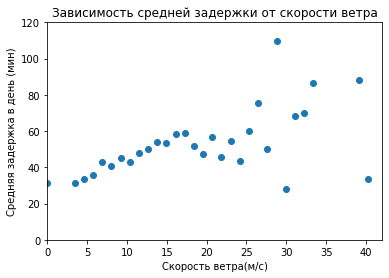

In [226]:
plt.scatter(times_summ_merged.wind_speed,times_summ_merged_mean)
plt.xlim(0, 42)
plt.ylim(0, 120)
plt.ylabel('Средняя задержка в день (мин)')
plt.xlabel('Скорость ветра(м/с)')
plt.title('Зависимость средней задержки от скорости ветра')
plt.show()

#### Таким образом, видно, что до скорости ветра примерно 25 м/с средняя задержка примерно одинаковая, а после этого порогового значения среднее время задержки может сильно увеличится. 
#### По такому графику можно понять, что время задержки коррелирует со скоростью ветра, но зависит от этого параметра не на 100%.

# 3
#### Посмотрим, как среднее время задержки зависит от времени отправления самолёта.

In [227]:
grouped_df = pd.DataFrame(df.groupby(df.hour)['dep_delay'].mean().reset_index(name='Mean_delay_departure'))
print(grouped_df)

    hour  Mean_delay_departure
0    0.0            128.642452
1    1.0            207.049327
2    2.0            239.921875
3    3.0            304.727273
4    4.0             -5.554098
5    5.0             -4.355644
6    6.0             -1.520552
7    7.0              0.223289
8    8.0              1.091432
9    9.0              4.268295
10  10.0              5.548644
11  11.0              5.652309
12  12.0              7.601892
13  13.0              9.380639
14  14.0              8.090381
15  15.0             10.682049
16  16.0             13.621150
17  17.0             16.756593
18  18.0             18.664671
19  19.0             21.497342
20  20.0             28.266213
21  21.0             42.064964
22  22.0             68.190042
23  23.0             96.946865
24  24.0             64.862069


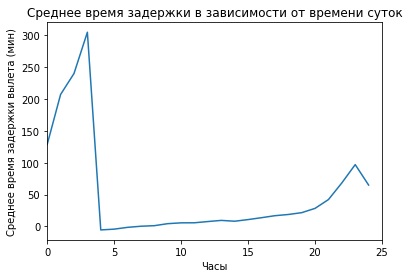

In [228]:
plt.plot(grouped_df.hour, grouped_df.Mean_delay_departure,'')
plt.xlim(0, 25)
plt.ylabel('Среднее время задержки вылета (мин)')
plt.xlabel('Часы')
plt.title('Среднее время задержки в зависимости от времени суток')
plt.show()

#### Мы видим, что большая часть задержек приходится на ночные рейсы и рейсы, отправляющиеся ранним утром. Поэтому можно предположить, что ночные и утренние задержки скорее всего связаны с тем, что ночью и ранним утром вылетает больше самолётов, чем в дневное время.

# 4
#### Проверим гипотезу о том, что ночью и ранним утром отправляется больше самолётов, чем днём.

In [229]:
#night_df= df[df.hour>20] 
night_df=df.loc[(df['hour']>=20.0) | (df['hour']<=7.0)]
day_df=df.loc[(df['hour']<20.0) & (df['hour']>7.0)]
day_value=day_df.shape[0]
#night_df

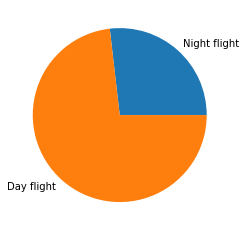

In [230]:
night_value=night_df.shape[0]
data = [night_value,day_value]
plt.pie (data,labels=['Night flight','Day flight'])

plt.show()

#### Т.е. мы видим, что количество самолётов, отправляемых в ночное время не превышает количество самолётов, отправляемых в дневное. Следовательно ночные задержки связаны не с количеством самолётов.

# 5
#### Посмотрим в процентном соотношении, какая часть отправляемых самолётов вылетает с задержкой в зависимости от времени суток.

In [231]:
filtered_df=df[df.dep_delay>0]
filtered_data=pd.DataFrame(filtered_df.groupby([filtered_df.hour])['dep_delay'].size().reset_index(name='Count'))
#print(data)
data=pd.DataFrame(df.groupby([df.hour])['dep_delay'].size().reset_index(name='Total_count'))
data_merged = pd.merge(filtered_data,data, on=['hour'])
data_merged['Persentage_of_delayed_aircrafts']=(data_merged.Count/data_merged.Total_count)*100
#print(data_merged)

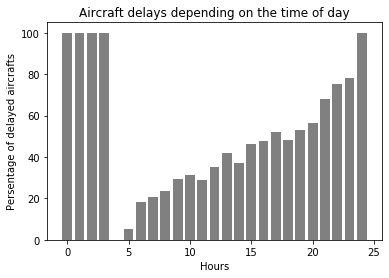

In [232]:
plt.bar(data_merged.hour, data_merged.Persentage_of_delayed_aircrafts, color='grey')
plt.ylabel('Persentage of delayed aircrafts')
plt.xlabel('Hours')
plt.title('Aircraft delays depending on the time of day')
plt.show()

#### Таким образом видно, что процент задержек возрастает ближе к ночи, максимален ночью,а в период с 12 ночи до 3 утра составляет 100%.

# 6
#### Найдём среднее время задержки прилёта и задержки отправления

In [233]:
grouped_df = df.groupby([df.month,df.day]).mean()
print(max(grouped_df.arr_delay)) # Cреднее время задержки прилёта
print(max(grouped_df.dep_delay)) # Среднее время задержки отправления

85.86215538847118
83.5369211514393


#### Посмотрим, какой день был самым невыгодным для полётов из Нью-Йорка

In [234]:
grouped_df = df.groupby([df.month,df.day]).mean()
print(grouped_df[grouped_df.dep_delay == max(grouped_df.dep_delay)])

           Unnamed: 0    year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                                       
3     8      143267.0  2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  


#### Таким образом самая высокая средняя задержка вылетов рейсов в 2013 году была 8 марта. Интересный факт:)

# 7
#### Посмотрим, какая была максимальная задержка отправления и задержка прилёта.

In [235]:
print(max(df.dep_delay)) #Максимальная задержка отправления
print(max(df.arr_delay)) #Максимальная задержка прилёта
#max(df.dep_delay=max_dep)


1301.0
1272.0


In [236]:
long_df=df.loc[(df['dep_delay']==max(df.dep_delay))]
long_df

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0


In [237]:
long_arr_df=df.loc[(df['arr_delay']==max(df.arr_delay))]
long_arr_df

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0


#### Рейс с самой большой задержкой отправления равной 1301 минуте оказался рейсом с самой большой задержкой прибытия, равной 1272 минутам. И этот рейс приходил зимой : 9 января.
#### Попробуем выяснить, что послужило причиной такой долгой задержки самолёта.


In [238]:
wether_long=dw.loc[(dw['day']==9)&(dw['month']==1)]
wether_long.head(8)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
191,192,EWR,2013,1.0,9.0,0.0,39.92,30.92,69.96,200.0,5.75390,6.621473,0.0,1028.7,10.0
192,193,EWR,2013,1.0,9.0,1.0,39.02,30.02,69.86,210.0,5.75390,6.621473,0.0,1028.6,10.0
193,194,EWR,2013,1.0,9.0,2.0,37.94,28.94,69.73,210.0,3.45234,3.972884,0.0,1028.6,10.0
194,195,EWR,2013,1.0,9.0,3.0,37.94,28.94,69.73,210.0,4.60312,5.297178,0.0,1029.3,10.0
195,196,EWR,2013,1.0,9.0,4.0,37.04,28.94,72.24,230.0,4.60312,5.297178,0.0,1029.2,10.0
196,197,EWR,2013,1.0,9.0,5.0,35.96,28.94,75.39,0.0,0.00000,0.000000,0.0,1029.1,10.0
197,198,EWR,2013,1.0,9.0,6.0,33.98,28.94,81.57,0.0,0.00000,0.000000,0.0,1028.7,10.0
198,199,EWR,2013,1.0,9.0,7.0,35.06,28.94,78.13,0.0,0.00000,0.000000,0.0,1028.5,10.0


In [239]:
print(wether_long.temp.mean())
print(wether_long.humid.mean())

40.7825
70.53125000000001


In [240]:
flight_long=df.loc[(df['day']==9)&(df['month']==1)]
flight_long.head(8)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
6998,6999,2013,1,9,2.0,3.0,432.0,-12.0,B6,N603JB,739,JFK,PSE,193.0,1617,0.0,2.0
6999,7000,2013,1,9,8.0,9.0,432.0,-5.0,B6,N563JB,727,JFK,BQN,188.0,1576,0.0,8.0
7000,7001,2013,1,9,457.0,-3.0,647.0,-1.0,US,N566UW,1117,EWR,CLT,87.0,529,4.0,57.0
7001,7002,2013,1,9,524.0,-6.0,837.0,6.0,UA,N17627,1564,LGA,IAH,214.0,1416,5.0,24.0
7002,7003,2013,1,9,524.0,-1.0,818.0,0.0,UA,N825UA,650,EWR,IAH,215.0,1400,5.0,24.0
7003,7004,2013,1,9,533.0,-7.0,823.0,-27.0,AA,N5CSAA,1141,JFK,MIA,148.0,1089,5.0,33.0
7004,7005,2013,1,9,536.0,-4.0,1007.0,-10.0,B6,N571JB,725,JFK,BQN,189.0,1576,5.0,36.0
7005,7006,2013,1,9,549.0,-11.0,815.0,-10.0,MQ,N542MQ,4650,LGA,ATL,128.0,762,5.0,49.0


In [241]:
data_JFK=df.loc[(df['day']==9)&(df['month']==1)&(df['carrier']=='HA')]
data_JFK

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0


In [242]:
data_JFK=df.loc[(df['day']==9)&(df['month']==1)&(df['origin']=='JFK')]
data_JFK.head(8)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
6998,6999,2013,1,9,2.0,3.0,432.0,-12.0,B6,N603JB,739,JFK,PSE,193.0,1617,0.0,2.0
6999,7000,2013,1,9,8.0,9.0,432.0,-5.0,B6,N563JB,727,JFK,BQN,188.0,1576,0.0,8.0
7003,7004,2013,1,9,533.0,-7.0,823.0,-27.0,AA,N5CSAA,1141,JFK,MIA,148.0,1089,5.0,33.0
7004,7005,2013,1,9,536.0,-4.0,1007.0,-10.0,B6,N571JB,725,JFK,BQN,189.0,1576,5.0,36.0
7010,7011,2013,1,9,554.0,-6.0,905.0,-1.0,B6,N809JB,125,JFK,FLL,152.0,1069,5.0,54.0
7011,7012,2013,1,9,554.0,-6.0,642.0,-16.0,US,N948UW,1833,JFK,PHL,29.0,94,5.0,54.0
7013,7014,2013,1,9,555.0,-5.0,950.0,25.0,UA,N532UA,303,JFK,SFO,383.0,2586,5.0,55.0
7020,7021,2013,1,9,559.0,-1.0,704.0,-11.0,EV,N828AS,5716,JFK,IAD,45.0,228,5.0,59.0


#### Т.к. погода 9 июня была относительно нормальной и остальные вылеты совершались по плану, то можно предположить, что проблема была связана только с внутренними делами аэропорта, так серьезно задержавшего рейс. А именно аэропорта JFK. К тому же можно увидеть, что проблема произошла только с этим рейсом, так как остальные все рейсы проходили в плюс минус штатном режиме.

# 8,9
#### Проведём анализ, какой из перевозчиков оказался наиболее часто задерживающим отправление и приземление самолётов.

In [245]:
filtered_df=df[(df.dep_delay>0)&(df.arr_delay>0)]

filtered_data_dep=pd.DataFrame(filtered_df.groupby([filtered_df.carrier])['dep_delay'].size().reset_index(name='Count'))
filtered_data_arr=pd.DataFrame(filtered_df.groupby([filtered_df.carrier])['arr_delay'].mean().reset_index(name='Mean_arr'))
#print(data)
data_dep=pd.DataFrame(df.groupby([df.carrier])['dep_delay'].size().reset_index(name='Total_count'))
data_arr=pd.DataFrame(df.groupby([df.carrier])['arr_delay'].size().reset_index(name='Total_count'))

data_merged_dep = pd.merge(filtered_data_dep,data_dep, on=['carrier'])
data_merged_arr = pd.merge(filtered_data_arr,data_arr, on=['carrier'])

data_merged_dep['Persentage_of_delayed_aircrafts']=(data_merged_dep.Count/data_merged_dep.Total_count)*100

print(data_merged_dep)


   carrier  Count  Total_count  Persentage_of_delayed_aircrafts
0       9E   5055        18460                        27.383532
1       AA   6668        32729                        20.373369
2       AS    125          714                        17.507003
3       B6  16436        54635                        30.083280
4       DL  10126        48110                        21.047599
5       EV  19183        54173                        35.410629
6       F9    256          685                        37.372263
7       FL   1386         3260                        42.515337
8       HA     37          342                        10.818713
9       MQ   6944        26397                        26.306020
10      OO      8           32                        25.000000
11      UA  16606        58665                        28.306486
12      US   3765        20536                        18.333658
13      VX   1217         5162                        23.576133
14      WN   4293        12275          

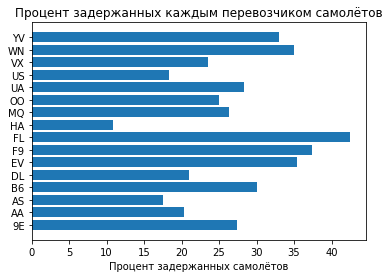

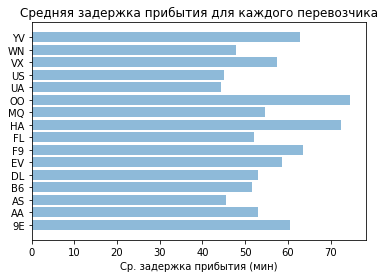

In [246]:
objects = data_merged_dep.carrier
plt.barh(data_merged_dep.carrier, data_merged_dep.Persentage_of_delayed_aircrafts, align='center', alpha=1.0)
plt.yticks(data_merged_dep.carrier, objects)
plt.xlabel('Процент задержанных самолётов')
plt.title('Процент задержанных каждым перевозчиком самолётов')
plt.show()
#print(data_merged_arr)
objects = data_merged_arr.carrier
plt.barh(data_merged_arr.carrier, filtered_data_arr.Mean_arr, align='center', alpha=0.5)
plt.yticks(data_merged_arr.carrier, objects)
plt.xlabel('Ср. задержка прибытия (мин)')
plt.title('Средняя задержка прибытия для каждого перевозчика')
plt.show()

In [247]:
print(data_merged_arr)

   carrier   Mean_arr  Total_count
0       9E  60.576261        18460
1       AA  53.099880        32729
2       AS  45.416000          714
3       B6  51.587613        54635
4       DL  53.057772        48110
5       EV  58.536621        54173
6       F9  63.578125          685
7       FL  51.943001         3260
8       HA  72.405405          342
9       MQ  54.632921        26397
10      OO  74.625000           32
11      UA  44.394737        58665
12      US  44.964409        20536
13      VX  57.398521         5162
14      WN  47.920568        12275
15      YV  62.929293          601


#### По диаграмме можно увидеть, что перевозчик FL является лидером по задержанным рейсам. НА не смотря на большое количество задержанных рейсов успевает реабилитироваться и нагнать отставание в пути. А вот F9 и EV занимают лидирующие позиции (конечно же в плохом смысле) как по задержке рейсов, так и по среднему времени задержки прилёта. Таким образом можно тщательнее обдумать вопрос сотрудничества с перевозчиками, показавшими себя не наилучшим образом.

# 10
####  Посмотрим, как один из параметров погоды, такой, как "видимость" влияем влияет на задержку рейсов из Нью-Йорка.

In [248]:
filtered_df=df[df.dep_delay>0]
groupby_for_analys = filtered_df.groupby([filtered_df.origin, filtered_df.month,
filtered_df.day, filtered_df.hour])
grouped_origin_time_hour = groupby_for_analys['dep_delay'].agg([np.size, np.mean]).reset_index()
#grouped_origin_time_hour

    visib  TotalDelay      Count
                 mean       mean
0    0.12   53.125926   9.333333
1    0.25   50.368918   9.266667
2    0.50   48.025944   8.081081
3    0.75  108.043222  10.375000
4    1.00   44.052121   8.615385
5    1.25   99.533333  15.000000
6    1.50   57.758718  10.785714
7    1.75  106.130952   7.000000
8    2.00   53.179340  10.566265
9    2.50   57.614434   9.750000
10   3.00   43.960403  11.780488
11   4.00   44.990879   9.128571
12   5.00   45.245112  10.178947
13   6.00   45.309186   7.691729
14   7.00   42.906023   8.536000
15   8.00   41.097958   8.829268
16   9.00   46.031925   9.126394
17  10.00   36.867483   7.761381


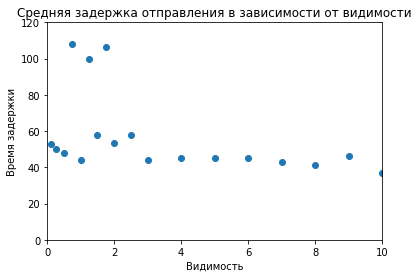

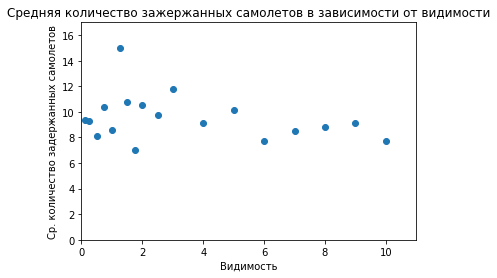

In [249]:
dw_and_df_merged = pd.merge(grouped_origin_time_hour,dw, on=['origin','day','month','hour'])
#print(dw_and_df_merged)
dw_and_df_merged = dw_and_df_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
visib_dfdw = dw_and_df_merged.groupby([dw_and_df_merged.visib])['TotalDelay','Count' ].agg([np.mean]).reset_index()
print(visib_dfdw)

plt.xlim(0, 10)
plt.ylim(0, 120)
plt.scatter(visib_dfdw.visib,visib_dfdw.TotalDelay)
plt.ylabel('Время задержки')
plt.xlabel('Видимость')
plt.title('Средняя задержка отправления в зависимости от видимости')
plt.show()


plt.xlim(0, 11)
plt.ylim(0, 17)
plt.scatter(visib_dfdw.visib,visib_dfdw.Count)
plt.ylabel('Ср. количество задержанных самолетов')
plt.xlabel('Видимость')
plt.title('Средняя количество зажержанных самолетов в зависимости от видимости')
plt.show()

#### Таким образом видно, что среднее время задержки сильно возрастает при видимости меньше 2-х миль, аналогично и среднее количество задержанных самолётов, сконцентрированно, когда видимость составляет меньше 2-х миль.